# ST4 MDS : TD 5 Temporal Series Volatility

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

## AIMS of the TD : 
* 1. inspect the ACF of r² to see if there is heteroskedasticity
* 2. Find the best ARCH(p) model using BIC and AIC, look at the regressed parameters
* 3. Find the best GARCH(p,q) model using BIC and AIC, look at the regressed
parameters
* 4.  Find the best GARCH(p,q) model with t-distribution using BIC and AIC, look at the regressed parameters
* 5. compare the minimal BIC of the points 2),3),4).
* 6. Look at the ACF of the residue2, conditional volatility, and devolatized returns of the best model. What do you observe?

# GARCH ARCH et tout FAUT annualiser * 252 le in sample

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from arch import arch_model
import powerlaw as pw 
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd 
import scipy
import itertools

In [2]:
__author__ = "Colleville Tanguy"
__version__ = "1.0.0"
__maintainer__ = "Colleville Tanguy"
__email__ = "tanguy.colleville@student-cs.fr"
__status__ = "Dev"

In [3]:
df=pd.read_csv(r"D:\CS_1A\ST4\Données statistiques en finance\TDs\TD 5\long_series_logret.csv",index_col=0)

In [4]:
df.index = pd.DatetimeIndex(df.index)

In [5]:
df.isna().sum()

NAV    0
dtype: int64

In [6]:
df.columns

Index(['NAV'], dtype='object')

In [7]:
df=df[df.index.year>2000]## y'a trop de 0 sinon et ça fausse l'étude

In [8]:
R_daily=np.array(df['NAV'].values)

# 1. r² and ACF 

In [9]:
R_carre=R_daily**2

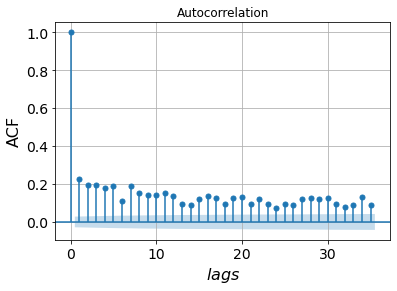

In [10]:
sm.graphics.tsa.plot_acf(R_carre,lags=35)# tu peux aller jusqu'à 100 yaura encore des termes statistiquement significatifs --> modèle arma trop de param 
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

# 2. Find the best ARCH(p) model using BIC and AIC, look at the regressed parameters

## very import ton annualize the R 

In [11]:
R=R_daily*252 ## to use the annualized return 

In [12]:
M = {}
P=[p for p in range(1,35)]
for p in P:
    try:
        #fit an arma (for now without trend)
        fit = arch_model(R,vol='ARCH', p=p).fit()
        M[p] = fit
    except ValueError:
        print(p, 'Maybe not stationary')
DATA_ARCH = pd.DataFrame( [(m,fit.aic,fit.bic) for m,fit in M.items()],columns=['model','AIC','BIC'] ) 
print(DATA_ARCH)

teration:     21,   Func. Count:    725,   Neg. LLF: 16392.740960286654
Iteration:     22,   Func. Count:    759,   Neg. LLF: 16457.685482403213
Iteration:     23,   Func. Count:    793,   Neg. LLF: 16403.98700086046
Iteration:     24,   Func. Count:    827,   Neg. LLF: 16468.52710514224
Iteration:     25,   Func. Count:    861,   Neg. LLF: 16397.452817106292
Iteration:     26,   Func. Count:    896,   Neg. LLF: 16452.929894488007
Iteration:     27,   Func. Count:    931,   Neg. LLF: 16373.954848606041
Iteration:     28,   Func. Count:    965,   Neg. LLF: 16428.776147070097
Iteration:     29,   Func. Count:  1e+03,   Neg. LLF: 16314.247809875926
Iteration:     30,   Func. Count: 1.03e+03,   Neg. LLF: 16357.75932852364
Iteration:     31,   Func. Count: 1.07e+03,   Neg. LLF: 16314.293805646568
Iteration:     32,   Func. Count: 1.1e+03,   Neg. LLF: 16371.59441095648
Iteration:     33,   Func. Count: 1.14e+03,   Neg. LLF: 16362.20106873499
Iteration:     34,   Func. Count: 1.17e+03,   Neg.

In [13]:
P=[p for p in range(1,35)]
BIC,AIC=[],[]
for i in P : 
    fit = arch_model(R,vol='ARCH', p=i).fit()
    BIC.append(fit.bic)
    AIC.append(fit.aic)

LLF: 19468.586953124293
Iteration:      3,   Func. Count:    103,   Neg. LLF: 17635.3575159529
Iteration:      4,   Func. Count:    137,   Neg. LLF: 17754.376488683352
Iteration:      5,   Func. Count:    171,   Neg. LLF: 26063.479632921255
Iteration:      6,   Func. Count:    206,   Neg. LLF: 17638.550230290908
Iteration:      7,   Func. Count:    241,   Neg. LLF: 17246.590942838095
Iteration:      8,   Func. Count:    275,   Neg. LLF: 49239.85810427017
Iteration:      9,   Func. Count:    310,   Neg. LLF: 27449.33968390501
Iteration:     10,   Func. Count:    344,   Neg. LLF: 19815.459077310275
Iteration:     11,   Func. Count:    379,   Neg. LLF: 19534.8603283847
Iteration:     12,   Func. Count:    414,   Neg. LLF: 17455.138519648914
Iteration:     13,   Func. Count:    449,   Neg. LLF: 16542.422226801034
Iteration:     14,   Func. Count:    483,   Neg. LLF: 19131.877194995577
Iteration:     15,   Func. Count:    518,   Neg. LLF: 16557.241014259987
Iteration:     16,   Func. Count:

No handles with labels found to put in legend.


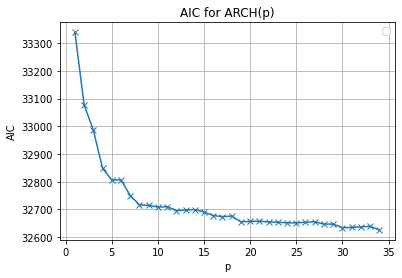

In [14]:
plt.plot(DATA_ARCH.model,DATA_ARCH.AIC,marker="x")
plt.ylabel("AIC")
plt.xlabel("p")
plt.title("AIC for ARCH(p)")
plt.legend()
plt.grid()
plt.show()

No handles with labels found to put in legend.


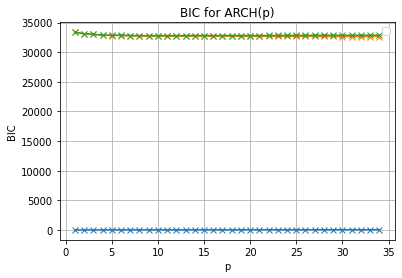

In [15]:
plt.plot(DATA_ARCH.model,DATA_ARCH.BIC,marker="x")
plt.ylabel("BIC")
plt.xlabel("p")
plt.title("BIC for ARCH(p)")
plt.legend()
plt.grid()
plt.show()

SI BIC et AIC sont très négative ça veut dire que les modèles fit bien, 
SI c'est très positif ça veut dire qu'il y a beaucoup de paramètres

P=8 sest le mdoèle avec AIC et BIC le plus faible on prend donc celui-ci

In [16]:
ft = arch_model(R,vol='ARCH', p=8).fit()
print(ft)

Iteration:      1,   Func. Count:     12,   Neg. LLF: 23911.621235945728
Iteration:      2,   Func. Count:     25,   Neg. LLF: 17036.98340006081
Iteration:      3,   Func. Count:     38,   Neg. LLF: 16880.82491243435
Iteration:      4,   Func. Count:     51,   Neg. LLF: 16705.533829457472
Iteration:      5,   Func. Count:     63,   Neg. LLF: 17250.01933237972
Iteration:      6,   Func. Count:     76,   Neg. LLF: 30089.64906849526
Iteration:      7,   Func. Count:     89,   Neg. LLF: 17322.1104290678
Iteration:      8,   Func. Count:    102,   Neg. LLF: 17113.202798355578
Iteration:      9,   Func. Count:    115,   Neg. LLF: 16676.109343523232
Iteration:     10,   Func. Count:    127,   Neg. LLF: 17383.223770299337
Iteration:     11,   Func. Count:    140,   Neg. LLF: 16409.090473756984
Iteration:     12,   Func. Count:    152,   Neg. LLF: 16406.02654541466
Iteration:     13,   Func. Count:    164,   Neg. LLF: 16350.28813951936
Iteration:     14,   Func. Count:    176,   Neg. LLF: 16351

In [17]:
# Most of them are significant, but they are a lot! We can copmare the best BIC of ARCH  with the best BIC from a GARCH(p,q)
## on voit que 0 n'est dans aucun intervalle de confiance

In [18]:
best_bic_arch = ft.bic

# 3. Find the best GARCH(p,q) model using BIC and AIC, look at the regressed parameters


In [19]:
M_GARCH = {}
GARCH_params=[(i,j) for i in range(1,6) for j in range(1,6)]

for p,q in GARCH_params:
    try:
        #fit an arma (for now without trend)
        fit = arch_model(R,vol='GARCH', p=p,q=q).fit()
        M_GARCH[p,q] = fit
    except ValueError:
        print(p,q, 'Maybe not stationary')
DATA_GARCH = pd.DataFrame( [(m,fit.aic,fit.bic) for m,fit in M_GARCH.items()],columns=['model','AIC','BIC'] )#
DATA_GARCH['P'], DATA_GARCH['Q'] = zip(*DATA_GARCH.model)
print(DATA_GARCH)## on sépare la colonne model, en deux colonnes P et Q 

909648
Iteration:     15,   Func. Count:    167,   Neg. LLF: 16323.540901187018
Iteration:     16,   Func. Count:    177,   Neg. LLF: 16323.540486897013
Iteration:     17,   Func. Count:    187,   Neg. LLF: 16323.540479329638
Iteration:     18,   Func. Count:    197,   Neg. LLF: 16323.54047730106
Iteration:     19,   Func. Count:    206,   Neg. LLF: 16323.540477774837
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16323.54047730106
            Iterations: 19
            Function evaluations: 206
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     12,   Neg. LLF: 36808711002.161964
Iteration:      2,   Func. Count:     25,   Neg. LLF: 48102.91424895581
Iteration:      3,   Func. Count:     38,   Neg. LLF: 17915.855936635813
Iteration:      4,   Func. Count:     51,   Neg. LLF: 16666.12676436924
Iteration:      5,   Func. Count:     64,   Neg. LLF: 16670.961140765263
Iteration:      6,   Func. Count:     76,   Neg. LLF: 16

In [20]:
print(DATA_GARCH.head())

    model           AIC           BIC  P  Q
0  (1, 1)  32677.534651  32703.474158  1  1
1  (1, 2)  32676.974454  32709.398837  1  2
2  (1, 3)  32668.540018  32707.449278  1  3
3  (1, 4)  32670.540019  32715.934155  1  4
4  (1, 5)  32673.163991  32725.043003  1  5


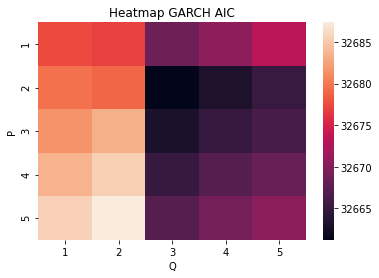

In [21]:
pivotted= DATA_GARCH.pivot('P','Q','AIC')
sns.heatmap(pivotted)
plt.title("Heatmap GARCH AIC")
plt.show()

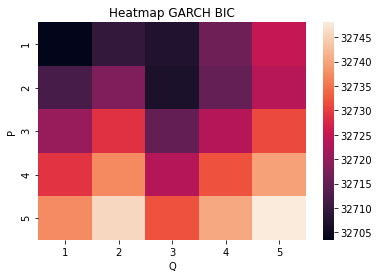

In [22]:
pivotted= DATA_GARCH.pivot('P','Q','BIC')
sns.heatmap(pivotted)
plt.title("Heatmap GARCH BIC")
plt.show()

In [23]:
plt.plot(DATA_GARCH.AIC)
plt.grid()
plt.show()

ValueError: setting an array element with a sequence.

The AIC seems to prefer very complex models; however,looking at the patameters many of them are not significant

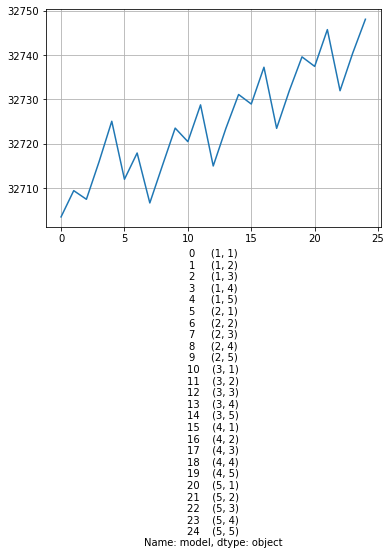

In [180]:
plt.plot(DATA_GARCH.set_index("model").BIC)
plt.grid()
plt.show()

In [203]:
i,j=DATA_GARCH.set_index("model").BIC.idxmin()# celui qui minimise le BIC
ft = arch_model(R, vol='GARCH', p=i,q=j).fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32170.995979417272
Iteration:      2,   Func. Count:     14,   Neg. LLF: 48366.6286727902
Iteration:      3,   Func. Count:     22,   Neg. LLF: 26805.49445084363
Iteration:      4,   Func. Count:     30,   Neg. LLF: 18470.106979754666
Iteration:      5,   Func. Count:     36,   Neg. LLF: 16334.771580670735
Iteration:      6,   Func. Count:     41,   Neg. LLF: 16334.767366171822
Iteration:      7,   Func. Count:     46,   Neg. LLF: 16334.767326610945
Iteration:      8,   Func. Count:     51,   Neg. LLF: 16334.767325742825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16334.767325742825
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8


In [206]:
ft

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -16334.8
Distribution:                  Normal   AIC:                           32677.5
Method:            Maximum Likelihood   BIC:                           32703.5
                                        No. Observations:                 4841
Date:                Mon, May 17 2021   Df Residuals:                     4840
Time:                        16:52:43   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1695  9.950e-02      1.704  8.845e-02 [-2.55

All the parameter are significant --> pas de 0 dans l'IT

In [ ]:
# The increment with respect to the best arch is huge
best_bic_arch - DATA_GARCH.BIC.min()

# 4.  Find the best GARCH(p,q) model with t-distribution using BIC and AIC, look at the regressed parameters


In [172]:
M_GARCH_t = {}
GARCH_params_t=[(i,j) for i in range(1,6) for j in range(1,6)]
for p,q in GARCH_params_t:
    try:
        #fit an arma (for now without trend)
        fit = arch_model(R,vol='GARCH', p=p,q=q,dist="t").fit()
        M_GARCH_t[p,q] = fit
    except ValueError:
        print(p,q, 'Maybe not stationary')
DATA_GARCH_t = pd.DataFrame( [(m,fit.aic,fit.bic) for m,fit in M_GARCH_t.items()],columns=['model','AIC','BIC'] ).set_index("model")
DATA_GARCH_t['P'], DATA_GARCH_t['Q'] = zip(*DATA_GARCH_t.model)

3419817041
Iteration:     22,   Func. Count:    259,   Neg. LLF: 16092.393419817043
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16092.393419817041
            Iterations: 22
            Function evaluations: 259
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     13,   Neg. LLF: 108228.5070064399
Iteration:      2,   Func. Count:     27,   Neg. LLF: 27091.638620831036
Iteration:      3,   Func. Count:     40,   Neg. LLF: 20094.571847947336
Iteration:      4,   Func. Count:     53,   Neg. LLF: 16483.0796735512
Iteration:      5,   Func. Count:     67,   Neg. LLF: 16206.390590640527
Iteration:      6,   Func. Count:     80,   Neg. LLF: 16161.436253953483
Iteration:      7,   Func. Count:     93,   Neg. LLF: 16113.74420909122
Iteration:      8,   Func. Count:    106,   Neg. LLF: 17266.016724618225
Iteration:      9,   Func. Count:    119,   Neg. LLF: 16110.327118100944
Iteration:     10,   Func. Count:    132,   Neg. LLF

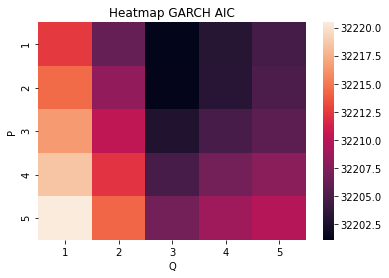

In [173]:
pivotted= DATA_GARCH_t.pivot('P','Q','AIC')
sns.heatmap(pivotted)
plt.title("Heatmap GARCH AIC")
plt.show()

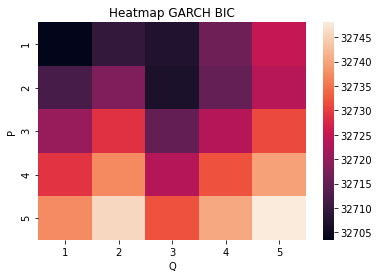

In [174]:
pivotted= DATA_GARCH_t.pivot('P','Q','BIC')
sns.heatmap(pivotted)
plt.title("Heatmap GARCH BIC")
plt.show()

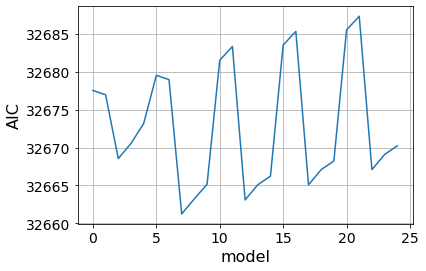

In [185]:
plt.plot(DATA_GARCH_t.set_index("model").AIC)
plt.grid()
plt.show()

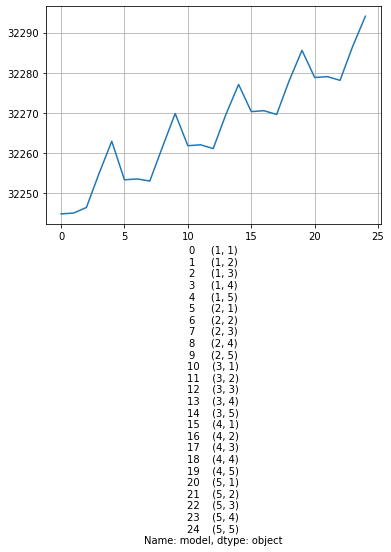

In [182]:
plt.plot(DATA_GARCH_t.set_index("model").BIC)
plt.grid()
plt.show()

In [205]:
i,j=DATA_GARCH_t.set_index("model").BIC.idxmin()
ft = arch_model(R, vol='GARCH', p=i,q=j).fit()
print(i,j)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32170.995979417272
Iteration:      2,   Func. Count:     14,   Neg. LLF: 48366.6286727902
Iteration:      3,   Func. Count:     22,   Neg. LLF: 26805.49445084363
Iteration:      4,   Func. Count:     30,   Neg. LLF: 18470.106979754666
Iteration:      5,   Func. Count:     36,   Neg. LLF: 16334.771580670735
Iteration:      6,   Func. Count:     41,   Neg. LLF: 16334.767366171822
Iteration:      7,   Func. Count:     46,   Neg. LLF: 16334.767326610945
Iteration:      8,   Func. Count:     51,   Neg. LLF: 16334.767325742825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16334.767325742825
            Iterations: 8
            Function evaluations: 51
            Gradient evaluations: 8
1 1


In [208]:
ft

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -16334.8
Distribution:                  Normal   AIC:                           32677.5
Method:            Maximum Likelihood   BIC:                           32703.5
                                        No. Observations:                 4841
Date:                Mon, May 17 2021   Df Residuals:                     4840
Time:                        16:52:43   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1695  9.950e-02      1.704  8.845e-02 [-2.55

P-value plus petite que 0.05 on est sur que zero n'est pas dedans et c'est important mais le mieux c'est jamais 0 dans l'intervalle
La valeur nu et coef ça correspond à l'exposent de la t-distribution

# 5. compare the minimal BIC of the points 2),3),4).


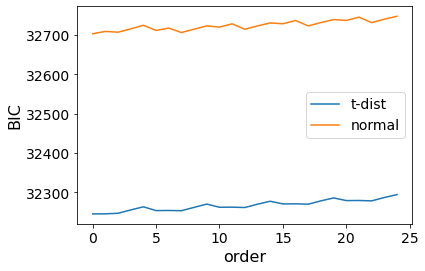

In [207]:
DATA_GARCH_t.BIC.plot(label='t-dist')
DATA_GARCH.BIC.plot(label='normal')
plt.tick_params(labelsize=14)
plt.ylabel('BIC',fontsize=16)
plt.xlabel('order',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.title("BIC for t-distribution  vs normal")
plt.grid()
plt.show()

The improvment of using the t-distribution is huge!

# 6. Look at the ACF of the residue2, conditional volatility, and devolatized returns of the best model. What do you observe?

In [2]:
plt.plot(ft.conditional_volatility)
plt.tick_params(labelsize=14)
plt.ylabel('conditional volatility',fontsize=16)
plt.show()

NameError: name 'ft' is not defined

In [ ]:
# The residues have significant serial correlation

In [ ]:
sm.graphics.tsa.plot_acf( ft.resid**2 )
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [ ]:
# Clearly also the conditional volatility has significant serial correlation

In [ ]:
sm.graphics.tsa.plot_acf( ft.conditional_volatility )
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [ ]:
# The conditional volatility show the typical volatility pattern we should expect, 
# i.e. volatility clustering

## Let us look at the devolatized returns

$${r_t}^{dev} = \frac{\epsilon_t}{\sigma_t}$$ 
avec $\epsilon_t$ le résidu et $\sigma_t$ la racine carrée de la variance conditionnelle du GARCH

In [ ]:
dev_ret = ft.resid/np.sqrt( ft.conditional_volatility )

In [ ]:
sm.graphics.tsa.plot_acf( dev_ret**2 )
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [ ]:
# They seems almost without a serial correlation

In [ ]:
acorr_ljungbox(dev**2,lags=10,return_df=True)

In [ ]:
# However the ljungbox test shows that indeed a significant serial correlation remains.